In [1]:
from datasets import list_datasets

all_datasets = list_datasets()

print(f"There are {len(all_datasets)} datasets cuirrently available on hub \n")

## lets look at fist 10 datasets
print("First 10 datasets are: \n")
for i in range(10):    
    print(f"{i}. {all_datasets[i]}")

There are 32269 datasets cuirrently available on hub 

First 10 datasets are: 

0. acronym_identification
1. ade_corpus_v2
2. adversarial_qa
3. aeslc
4. afrikaans_ner_corpus
5. ag_news
6. ai2_arc
7. air_dialogue
8. ajgt_twitter_ar
9. allegro_reviews


In [3]:
from datasets import get_dataset_split_names

print(f"Splits in dataset : {get_dataset_split_names('emotion')} ")

No config specified, defaulting to: emotion/split


Splits in dataset : ['train', 'validation', 'test'] 


In [9]:
from datasets import load_dataset

emotions = load_dataset("emotion")


No config specified, defaulting to: emotion/split
Found cached dataset emotion (/Users/ravishankar/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [20]:
train_ds = emotions["train"]
val_ds = emotions["validation"]
test_ds = emotions["test"]

train_ds[0]
train_ds.column_names

['text', 'label']

In [23]:
## We can see what data types are being used under the hood by accessing the features attribute of a Dataset object:

train_ds.features 

## In this case, the data type of the text column is string, 
## while the label column is a special ClassLabel object that contains information about the class names and their mapping to integers. 

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

![Alt text](notebook_images/Screenshot%202023-05-02%20at%204.32.07%20pm.png)


Alternatively, the source files for the emotion dataset are actually hosted on Dropbox, so an alternative way to load the dataset is to first download one of the splits:


In [24]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"

!wget {dataset_url}

--2023-05-02 16:35:50--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/1pzkadrvffbqw6o/train.txt [following]
--2023-05-02 16:35:51--  https://www.dropbox.com/s/raw/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2023-05-02 16:35:52 ERROR 404: Not Found.



In [25]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [26]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)


df["label_name"] = df["label"].apply(label_int2str)
df.head

<bound method NDFrame.head of                                                     text  label label_name
0                                i didnt feel humiliated      0    sadness
1      i can go from feeling so hopeless to so damned...      0    sadness
2       im grabbing a minute to post i feel greedy wrong      3      anger
3      i am ever feeling nostalgic about the fireplac...      2       love
4                                   i am feeling grouchy      3      anger
...                                                  ...    ...        ...
15995  i just had a very brief time in the beanbag an...      0    sadness
15996  i am now turning and i feel pathetic that i am...      0    sadness
15997                     i feel strong and good overall      1        joy
15998  i feel like this was such a rude comment and i...      3      anger
15999  i know a lot but i feel so stupid because i ca...      0    sadness

[16000 rows x 3 columns]>

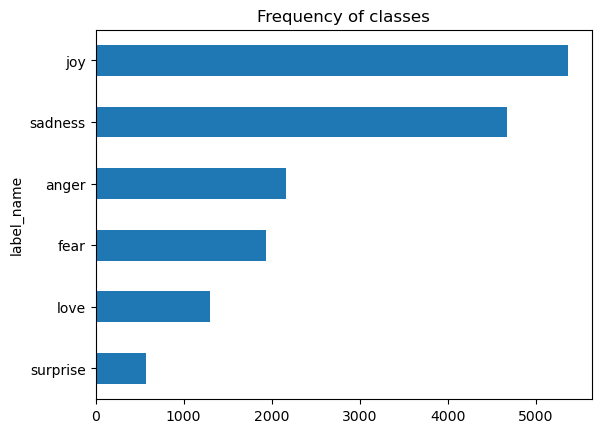

In [27]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of classes")
plt.show()

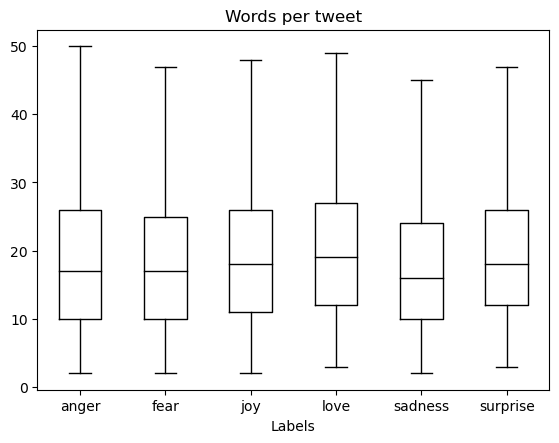

In [33]:
df["Words per tweet"] = df["text"].str.split().apply(len)

df.boxplot("Words per tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("Labels")
plt.show()

In [34]:
emotions.reset_format()

In [41]:
text = "Tokenizing text is a core task of NLP."

tokenised_text = list(text)
print(tokenised_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [42]:
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenised_text)))}
token2idx


{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [43]:
input_ids = [token2idx[token] for token in tokenised_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [44]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encoding = F.one_hot(input_ids, num_classes = len(token2idx))
one_hot_encoding.shape

torch.Size([38, 20])

In [58]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"

tokeniser = AutoTokenizer.from_pretrained(model_ckpt)


In [56]:
from transformers import DistilBertTokenizer
distilbert_tokeniser = DistilBertTokenizer.from_pretrained(model_ckpt)

In [59]:
encoded_text = tokeniser(text)
print(f"Encoded text : {encoded_text}")



Encoded text : {'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [61]:
tokens = tokeniser.convert_ids_to_tokens(encoded_text.input_ids)
print(f"Tokens : {tokens}")


print(tokeniser.convert_tokens_to_string(tokens))

Tokens : ['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']
[CLS] tokenizing text is a core task of nlp. [SEP]


In [67]:
print(f"Vocab size of tokeniser is :  {tokeniser.vocab_size} \n")
print(f"Corresponding model's maximum context size: {tokeniser.model_max_length} \n")

print(f"Names of fields that model expects in its forward pass are : {tokeniser.model_input_names} ")

Vocab size of tokeniser is :  30522 

Corresponding model's maximum context size: 512 

Names of fields that model expects in its forward pass are : ['input_ids', 'attention_mask'] 


In [70]:
def tokenize(batch):
    return tokeniser(batch["text"], padding=True, truncation=True,  )

In [71]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


![Alt text](notebook_images/Screenshot%202023-05-02%20at%206.48.18%20pm.png)

In [72]:
emotions_encoded = emotions.map(tokenize, batched= True, batch_size=None)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]